# Statistical Rating analysis and Customer behavioural Analysis:

This project is based on one of the most interesting topic : **Movie Recommendations**. In this notebook we are going to check whether we can find top movies as per rating and popularity and other features.

As we are going through the rating we will also try to find the best audiences and prepare medias for them which will be a **GOAL** of this project.

As we are using a kaggle dataset and downloading it not locally , so we have to take following steps.
1. We have to connect the notebook with *Kaggle*.
2. Then we have to download the data straight from the kaggle repository via API token.
3. As the data would be in a .zip file we'll have to extract the data for further usage.

In [355]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [356]:
!kaggle datasets download -d eswarchandt/amazon-movie-ratings

  0% 0.00/77.1k [00:00<?, ?B/s]
100% 77.1k/77.1k [00:00<00:00, 25.8MB/s]


In [357]:
from zipfile import ZipFile
zf = ZipFile('/content/amazon-movie-ratings.zip', 'r')
zf.extractall('/content')
zf.close()

### Libraries :

In [358]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Now we are going to read the files and then visualize it for the first time, this might help us to understand that how we can wrangle the data.

In [359]:
df=pd.read_csv('Amazon.csv')
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,...,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that every single subscriber haven't given review or rating for every sigle movie but for some single ones. This helps us understand the consumer/subscribers taste of content.

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [361]:
df_1=df.fillna(0.0)
df_1.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,...,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


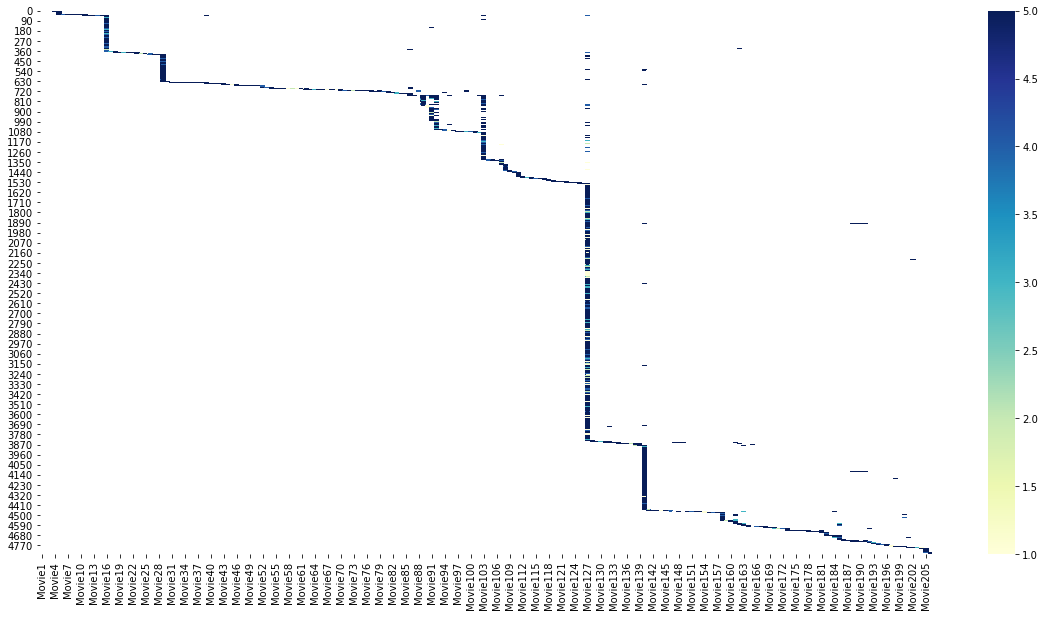

In [362]:

plt.figure(figsize=(20,10))
sns.heatmap(df.drop('user_id',axis=1),cmap="YlGnBu")
plt.show()

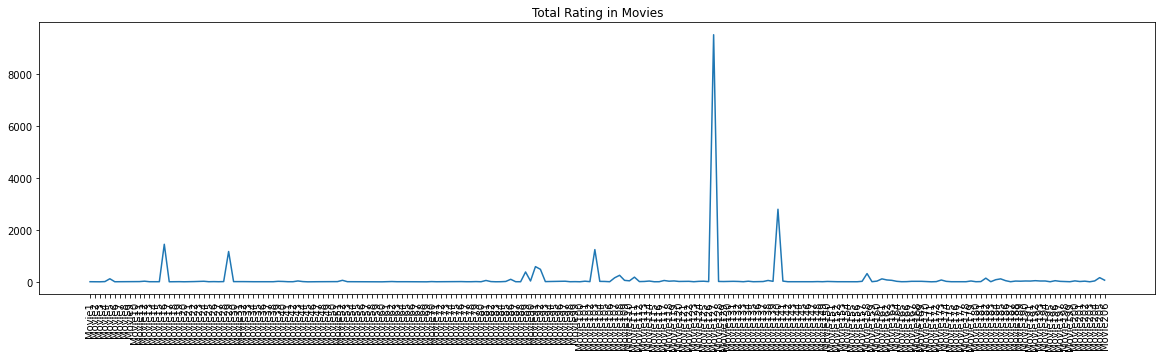

In [363]:
plt.figure(figsize=(20,5))
plt.title('Total Rating in Movies')
plt.plot(df.drop('user_id',axis=1).sum())
plt.xticks(rotation=90)
plt.show()

We can conclude here that some movies have been rated by more consumer and some are very less.

In [364]:
df.shape

(4848, 207)

# Movie Recommendation based on votes and ratings :

In this part we are going to check for the highest rated and the highets voted films. In this type section we can find the best suited movie for the mass and then can produce the same type of criteria which will be beneficial for the production houses to collect more profits.

In [365]:
arr=[]
for i in df_1.columns:
  #print(df[i].isnull().sum())
  if df[i].isnull().sum()!=4848:
    arr.append(i)

df_actual=df[arr]
df_actual.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,...,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
df_actual.shape

(4848, 207)

The new dataframe has the same shape as the previous dataframe which indicates that every single movie has atleast one ratings by this far.

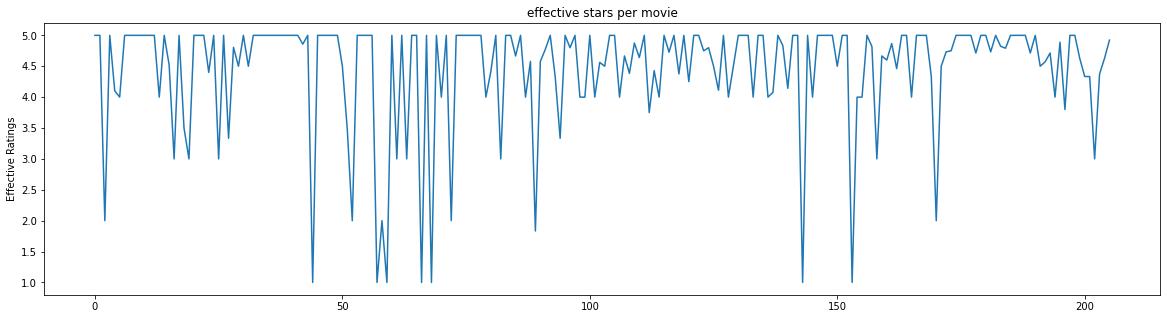

In [367]:
arr=[]
pep_cnt=[]
for col in df_actual.drop('user_id',axis=1).columns:
  arr.append(df_actual[col].sum()/(4848-df_actual[col].isnull().sum()))
  pep_cnt.append((4848-df_actual[col].isnull().sum()))
plt.figure(figsize=(20,5))
plt.title('effective stars per movie')
plt.ylabel('Effective Ratings')
plt.plot(arr)
plt.show()

After visualizing the average rating we can identify that most of the movies are rated in a range greater than 4 and less than 5.

still there are a number of movies (very less) which have recieved very low consumer rating.

In [368]:
df_ranked=pd.DataFrame({'movie_name':np.arange(1,207,1),'eff_score':arr,'votes':pep_cnt})
df_ranked.head()

,movie_name,eff_score,votes
0,1,5.000000,1
1,2,5.000000,1
2,3,2.000000,1
3,4,5.000000,2
4,5,4.103448,29


This dataset has been produced on the total votes and effective ratings. This will help us get the best recommendation as per the client response found in the dataset.

#### Best Rating Recommendation

In [369]:
df_ranked.sort_values(by=['eff_score','votes'],ascending=False)

,movie_name,eff_score,votes
185,186,5.0,9
187,188,5.0,6
190,191,5.0,6
11,12,5.0,5
100,101,5.0,5
...,...,...,...
59,60,1.0,1
66,67,1.0,1
68,69,1.0,1
143,144,1.0,1


In [370]:
x=df_ranked[df_ranked['eff_score']>4]
Best_movie_per_rating=[]
for i in x['movie_name']:
  Best_movie_per_rating.append(i)
np.asarray(Best_movie_per_rating).reshape(23,7)

array([[  1,   2,   4,   5,   7,   8,   9],
       [ 10,  11,  12,  13,  15,  16,  18],
       [ 21,  22,  23,  24,  25,  27,  29],
       [ 30,  31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42,  43],
       [ 44,  46,  47,  48,  49,  50,  51],
       [ 54,  55,  56,  57,  61,  63,  65],
       [ 66,  68,  70,  72,  74,  75,  76],
       [ 77,  78,  79,  81,  82,  84,  85],
       [ 86,  87,  89,  91,  92,  93,  94],
       [ 96,  97,  98, 101, 103, 104, 105],
       [106, 108, 109, 110, 111, 112, 114],
       [116, 117, 118, 119, 120, 121, 122],
       [123, 124, 125, 126, 127, 128, 130],
       [131, 132, 133, 135, 136, 138, 139],
       [140, 141, 142, 143, 145, 147, 148],
       [149, 150, 151, 152, 153, 157, 158],
       [160, 161, 162, 163, 164, 165, 167],
       [168, 169, 170, 172, 173, 174, 175],
       [176, 177, 178, 179, 180, 181, 182],
       [183, 184, 185, 186, 187, 188, 189],
       [190, 191, 192, 193, 194, 196, 198],
       [199, 200, 201, 202, 204,

#### Best popularity recommendation :

In [371]:
df_ranked.sort_values(by=['votes','eff_score'],ascending=False)

,movie_name,eff_score,votes
126,127,4.111976,2313
139,140,4.833910,578
15,16,4.518750,320
102,103,4.562500,272
28,29,4.806584,243
...,...,...,...
59,60,1.000000,1
66,67,1.000000,1
68,69,1.000000,1
143,144,1.000000,1


In [372]:
x=df_ranked[df_ranked['votes']>4]
Best_movie_per_popularity=[]
for i in x['movie_name']:
  Best_movie_per_popularity.append(i)
#len(Best_movie_per_popularity)
np.asarray(Best_movie_per_popularity).reshape(19,3)

array([[  5,  12,  16],
       [ 24,  29,  43],
       [ 52,  81,  86],
       [ 89,  90,  91],
       [ 92,  95,  97],
       [101, 103, 107],
       [108, 109, 110],
       [111, 114, 117],
       [118, 119, 125],
       [127, 134, 138],
       [140, 141, 158],
       [160, 161, 162],
       [163, 173, 179],
       [182, 184, 185],
       [186, 188, 189],
       [190, 191, 192],
       [193, 194, 196],
       [197, 200, 202],
       [204, 205, 206]])

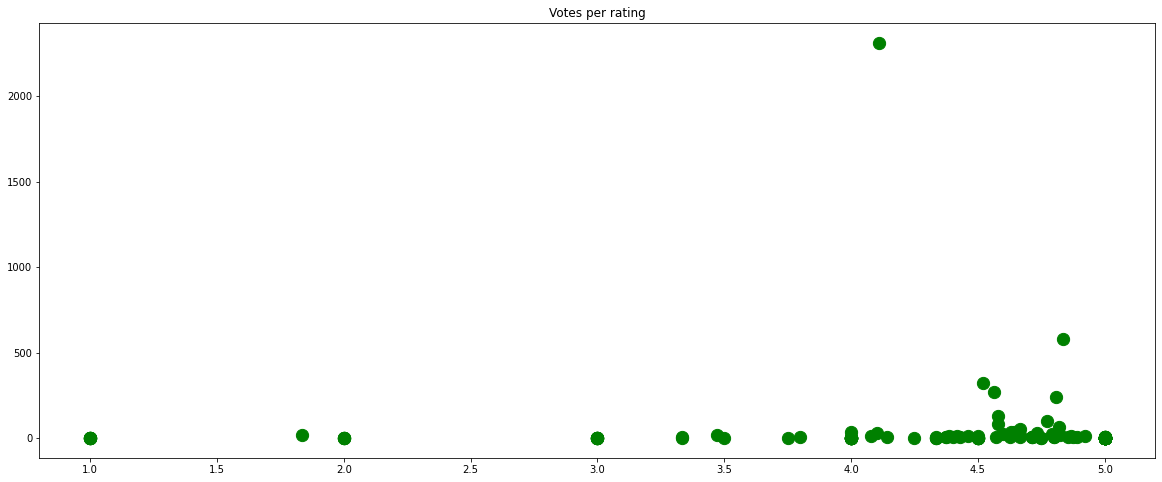

In [373]:
plt.figure(figsize=(20,8))
plt.title('Votes per rating')
plt.scatter(df_ranked['eff_score'],df_ranked['votes'],color='g',s=150)
plt.show()

# Behavorial Analysis of consumer :

As the company should produce best content as per the rating also they should find out the consumers which are not showing healthy behaviour ( giving ratings without visiting and others).

In [374]:
consumer=df.T
consumer.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,ANF0AGIV0JCH2,A3LDEBLV6MVUBE,A1R2XZWQ6NM5M1,A36L1XGA5AQIJY,A2HWI21H23GDS4,A1DNYFL3RSXRMO,A39VF226GBM1JH,ASB0E2O2FLNA7,A19E15Y9V09CVJ,A3K979KQ7K0S5K,A39ZX6X5H2N4TS,A2Z3ZHQI6YXKHH,A2RNKU9KJHQ2BV,A30WLYNJA3B17H,A3LI15T4YR5WD6,AV3UWBH6K0ETD,A312A70K5UUL1N,A23PSBNOBPLCOM,ATEOWCA0EHRQR,A2T8A34ZSAXGHA,A3G3WG4UMDSF8M,A3LHVMF6OJXJNM,A35ZSFP89PWC5B,ALQGU53I8TCU6,A1XU4NX76WRGZM,A1Z6CDRFVIHES5,AR6RBE9S8XZ8C,A2X0GJ1KR9B8U0,A1Z1NDXGCNMEST,A2GWNIH0RTOM67,...,A26D3NBYOIZRGE,A16OKS0HN6SL4S,A326Y8FFWXB1E7,A2IGMIAE0NR8M2,APKIZVAA35S8N,A1AJGEF2M3M8QA,A15KWS94WBQDIE,A2QS5LDQJ7JV0B,A3U3IT3S2GW8L1,A3LFPL2EDMMAN5,A1JYYFGPMHSEB6,A4LNTR1DZQXHC,A32OHAXPTGZ3ML,ARNOT3G5WS1ML,A3KPYTKXGKMUVF,AJX0YJBK0SWDR,A2E4OJWMR87W67,A39FHHGWESJIXE,AX7MXR0RLMX31,A1CHS5AQLXXDXJ,A2KT3M7HFAOSKR,A1M27P0B2QCOH8,A2G3QM6ZLT66HO,A2YSM4732ZHGZB,A1PT4GB3A675ZW,A23E3CUB03Z3YX,A1DQA0HJSSAD5A,A3FEZW3VTMKX15,A38BQZBXICC9C5,A27167LRSJEY1B,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie4,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
consumer.shape

(207, 4848)

In [376]:
print('Given rating :')

207-consumer.isnull().sum()

Given rating :


0       3
1       2
2       2
3       2
4       2
       ..
4843    2
4844    2
4845    2
4846    2
4847    2
Length: 4848, dtype: int64

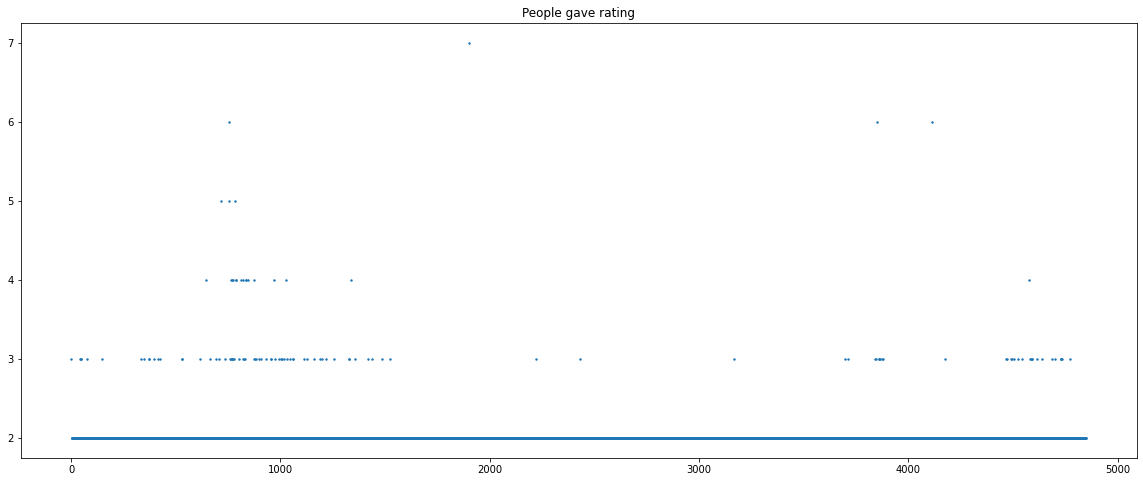

In [377]:
m=consumer.isnull().sum()
plt.figure(figsize=(20,8))
plt.title('People gave rating')
plt.scatter(np.arange(1,len(m)+1),207-m,s=2)
plt.show()

In [378]:
consumer.fillna(0.0,inplace=True)

In [379]:
c1=consumer.drop('user_id',axis=0)
c1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
Movie1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Movie2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Movie3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Movie4,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Movie5,0,0,0,0,5,2,5,2,5,5,5,5,5,1,4,5,1,5,5,5,5,5,5,5,5,2,1,5,5,2,5,4,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


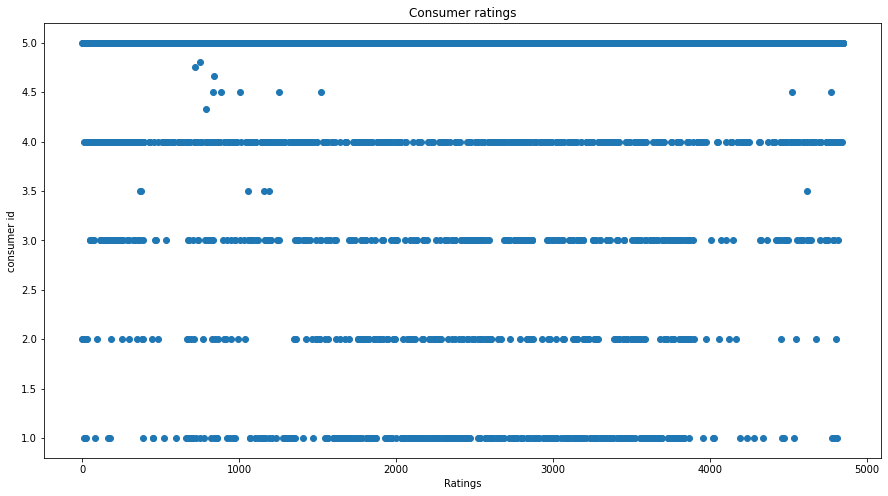

In [380]:
average_rating=[]
ratings_given=[]
for i in c1.columns:
  val=c1[i].sum()/(len(c1[c1[i]>0]))
  average_rating.append(val)
  ratings_given.append(len(c1[c1[i]>0]))
plt.figure(figsize=(15,8))
plt.title('Consumer ratings')
plt.xlabel('Ratings')
plt.ylabel('consumer id')
plt.scatter(np.arange(1,len(average_rating)+1,1),average_rating)
plt.show()

In [381]:
con_data=pd.DataFrame({'id':np.arange(1,4849,1),'av_rating':average_rating,'rating_count':ratings_given})
con_data.head()

,id,av_rating,rating_count
0,1,5.0,2
1,2,2.0,1
2,3,5.0,1
3,4,5.0,1
4,5,5.0,1


In [382]:
con_data.sort_values(by=['av_rating','rating_count'],ascending=False)

,id,av_rating,rating_count
1899,1900,5.0,6
3850,3851,5.0,5
4114,4115,5.0,5
754,755,5.0,4
784,785,5.0,4
...,...,...,...
4537,4538,1.0,1
4775,4776,1.0,1
4787,4788,1.0,1
4792,4793,1.0,1


In [383]:
con_data.sort_values(by=['rating_count','av_rating'],ascending=False)

,id,av_rating,rating_count
1899,1900,5.0,6
3850,3851,5.0,5
4114,4115,5.0,5
753,754,4.8,5
754,755,5.0,4
...,...,...,...
4537,4538,1.0,1
4775,4776,1.0,1
4787,4788,1.0,1
4792,4793,1.0,1


In [384]:
len(con_data.loc[(con_data.av_rating<2) & (con_data.rating_count<2)])


357

In [385]:
fin_data=con_data.loc[(con_data.av_rating>=2) | (con_data.rating_count>=2)]

In [386]:
fin_data

,id,av_rating,rating_count
0,1,5.0,2
1,2,2.0,1
2,3,5.0,1
3,4,5.0,1
4,5,5.0,1
...,...,...,...
4843,4844,5.0,1
4844,4845,5.0,1
4845,4846,5.0,1
4846,4847,5.0,1


So the fin_data contains all the consumer who are very light or happy behavorial and not making any degrdataion while creating or punlishing any content. 

In [387]:
well_subscribers=[]

#print("The list of names of good subscribers are :")
for i in fin_data['id']:
  try:
    #print(df['user_id'][i])
    well_subscribers.append(df['user_id'][i])
  except:
    pass
well_subscribers=pd.DataFrame({'names':well_subscribers})
well_subscribers.to_csv('well_subscribers.csv',index=False)

In [388]:
best_film_data=con_data.loc[(con_data.av_rating>5) | (con_data.rating_count>=4)]

In [389]:
len(best_film_data)

7

As they are giving reviews on more than 4 contents we are predicting he/she is amazed with the content and also the platform. If we can produce the content similar to these people's liked list that would be nice for growth of the platform i.e. for Amazon.

In [390]:
best_film_data

,id,av_rating,rating_count
717,718,4.75,4
753,754,4.80,5
754,755,5.00,4
784,785,5.00,4
1899,1900,5.00,6
3850,3851,5.00,5
4114,4115,5.00,5


In [391]:
movie_name=[]

for i in best_film_data['id']:
  for j in df.iloc[i-1][df.iloc[i-1].isnull()==False].index[1:]:
    if j  not in movie_name:
      movie_name.append(j)


In [392]:
movie_name

['Movie77',
 'Movie79',
 'Movie88',
 'Movie99',
 'Movie86',
 'Movie90',
 'Movie92',
 'Movie95',
 'Movie102',
 'Movie91',
 'Movie103',
 'Movie107',
 'Movie89',
 'Movie127',
 'Movie140',
 'Movie188',
 'Movie189',
 'Movie190',
 'Movie191',
 'Movie133',
 'Movie147',
 'Movie148',
 'Movie149',
 'Movie161']

These whole project ends here declaring these movies which are the most effective towards subscribers and if contents are produced similar to this ones, thus creating profit .


## HURRAH!
We've completed a recommendation system projects.

If you have like this projct go through my other projects on other topics on [kaggle](https://kaggle.com/sagnik1511/notebooks) or in [github](https://github.com/sagnik1511/repositories).

# THANK YOU :)